# 장애인콜택시 대기시간 예측
## 단계2. 탐색적 데이터 분석

## 0.미션

* 1.개별 변수 분석하기
    * 앞서 생성된 각 변수들 특히 추가로 생성한 변수들에 대해서 단변량 분석을 수행합니다.
    * 시각화 : Histogram, Boxplot, Barplot
    * 통계량 : 기초 통계량.
    * [옵션] 날짜 요소 관점을 추가해서 EDA 를 수행하시오.
* 2.Features와 Target의 관계 분석하기
    * Target은 숫자입니다.
    * 숫자형 feature들과 Target 과의 관계
        * 한꺼번에 상관관계를 확인하는 방법을 이용하여 분석합시다.
    * 범주형 feature들과 Target
        * sns.barplot, t-검정, 분산분석 등을 이용하여 분석합니다.
    * Target과 관련이 높은 feature와 그렇지 않은 feature를 정리해 봅시다.

## 1.환경설정

* 세부 요구사항
    - 경로 설정 : 다음의 두가지 방법 중 하나를 선택하여 폴더를 준비하고 데이터를 로딩하시오.
        * 1) 로컬 수행(Ananconda)
            * 제공된 압축파일을 다운받아 압축을 풀고
            * anaconda의 root directory(보통 C:/Users/< ID > 에 project 폴더를 만들고, 복사해 넣습니다.
        * 2) 구글콜랩
            * 구글 드라이브 바로 밑에 project 폴더를 만들고,
            * 데이터 파일을 복사해 넣습니다.
    - 라이브러리 설치 및 로딩
        * requirements.txt 파일로 부터 라이브러리 설치
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
        * 필요하다고 판단되는 라이브러리를 추가하세요.


### (1) 경로 설정

#### 1) 로컬 수행(Anaconda)
* project 폴더에 필요한 파일들을 넣고, 본 파일을 열었다면, 별도 경로 지정이 필요하지 않습니다.

In [ ]:
path = ''

#### 2) 구글 콜랩 수행

* 구글 드라이브 연결

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
path = '/content/drive/MyDrive/project/'

### (2) 라이브러리 설치 및 불러오기

In [ ]:
# df[df['season']=='winter']

#### 1) 설치

* requirements.txt 파일을 아래 위치에 두고 다음 코드를 실행하시오.
    * 로컬 : 다음 코드셀 실행
    * 구글콜랩 : requirements.txt 파일을 왼쪽 [파일]탭에 복사해 넣고 다음 코드셀 실행

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.3/200.3 MB 4.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
  Attempting uninstall: xgboost
    Found existing installation: xgboost 1.7.6
    Uninstalling xgboost-1.7.6:
      Successfully uninstalled xgboost-1.7.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
plotnine 0.12.3 requires numpy>=1.23.0, but you have numpy 1.22.4 which is incompatible.


#### 2) 라이브러리 로딩

* **세부 요구사항**
    - 기본적으로 필요한 라이브러리를 import 하도록 코드가 작성되어 있습니다.
    - 필요하다고 판단되는 라이브러리를 추가하세요.

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
pd.options.display.max_columns = None

### (3) 데이터 불러오기
* **세부 요구사항**
    - 전처리 단계에서 저장한 파일을 불러옵니다. data1pkl

In [6]:
import pickle

In [7]:
file1 = '/content/drive/MyDrive/project/data1.pkl'

In [8]:
with open(file1, 'rb') as f:
        df=joblib.load(f)

## 2.EDA : 1단계 - 개별 정보 분석하기

* **세부요구사항**
    * 의미 있는 변수들을 7개 이상 선정하고 단변량분석을 수행합니다.
    * [옵션] 각 변수에 대한 탐색시, 요일별, 월별, 연도별로 나눠서도 확인해보세요.
    * 단변량 분석을 위한 코드를 함수로 작성하고 수행하세요.

### (1) 단변량 분석 함수 작성
* **세부요구사항**
    * 코드가 반복되므로, 시각화와 기초통계량을 한꺼번에 처리하는 함수를 생성합시다.
    * 포함되어야 할 내용 :
        * 기초통계량
            * 숫자 : .describe()
            * 범주 : 범주별 빈도수/비율
        * 시각화


In [10]:
# 숫자형 변수 분석
def numerical(col):
  print(df[col].describe())
  sns.histplot(x=col,data=df,bins=20)
  sns.kdeplot(x=col,data=df)
  sns.boxplot(x=col, data=df)
  plt.show()

In [11]:
# 범주형 변수 분석
def categorical(col):
  print(df[col].value_counts())
  print(df[col].value_counts(normalize=True))
  sns.countplot(x = col, data = df)
  plt.show()


In [12]:
def eda_1_n( var, bins = 30) :
    # 기초 통계량
    display(df[[var]].describe().T)

    # 시각화
    plt.figure(figsize = (12,8))
    plt.subplot(2,1,1)
    sns.histplot(df[var], bins = bins, kde = True) #히스토그램과 KDE 동시에
    plt.grid()

    plt.subplot(2,1,2)
    sns.boxplot(x = df[var])
    plt.grid()
    plt.show()

### (2) 숫자형 변수
* 이제 숫자형 변수들에 대해서 단변량 분석을 수행합니다.

In [13]:
# air['Date'] = pd.to_datetime(air['Date']) # 날짜 형식으로 변환

# plt.plot('Date', 'Ozone', 'g-', data = air, label = 'Ozone')
# plt.plot('Date', 'Temp', 'r-', data = air, label = 'Temp')

# plt.xlabel('Date')
# plt.legend()
# plt.show()

In [14]:
df.head(8)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899,False
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919,False
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927,False
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878,True
5,2015-01-06,417,3991,3633,23.6,2211,8545,1,1,2,2015,6,-1.0,-8.8,0.0,42.0,24.0,10.12,winter,0,23.540000,0.910,False
6,2015-01-07,410,4085,3676,24.7,2230,8646,2,1,2,2015,7,-0.2,-9.2,0.0,62.0,27.0,10.09,winter,0,23.733333,0.900,False
7,2015-01-08,419,4030,3728,21.2,2231,8683,3,1,2,2015,8,3.2,-6.8,0.0,78.0,38.0,8.74,winter,0,23.371429,0.925,False


,count,mean,std,min,25%,50%,75%,max
fare,2922.0,2304.272416,107.26008,2131.0,2228.0,2257.0,2400.75,2733.0


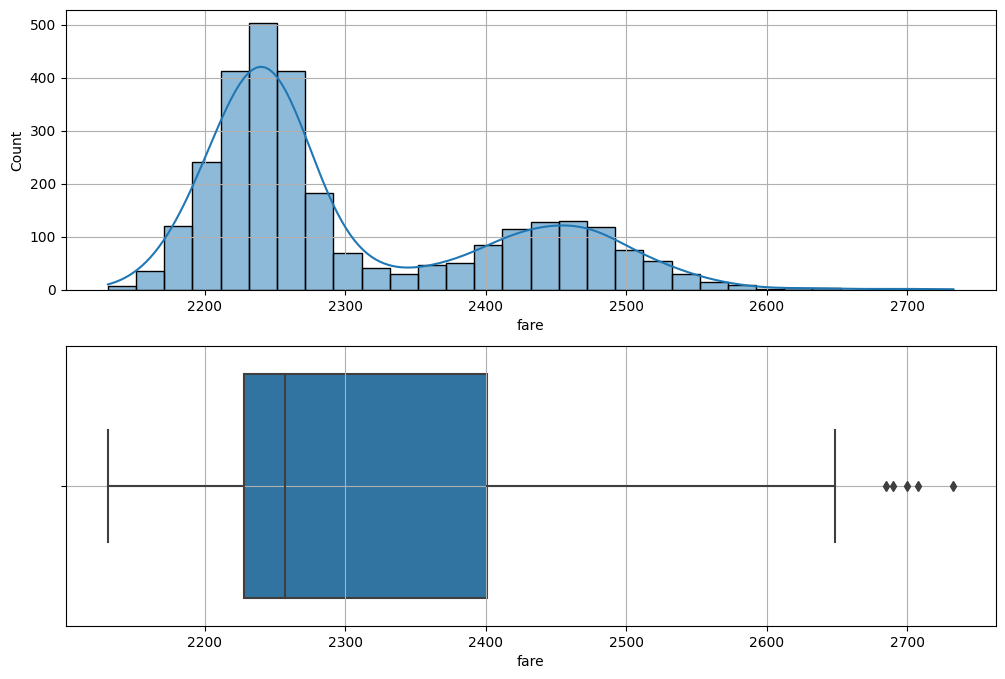

In [15]:
eda_1_n('fare')

,count,mean,std,min,25%,50%,75%,max
waiting_time7,2921.0,40.290875,12.044117,17.2,31.285714,39.028571,46.971429,83.928571


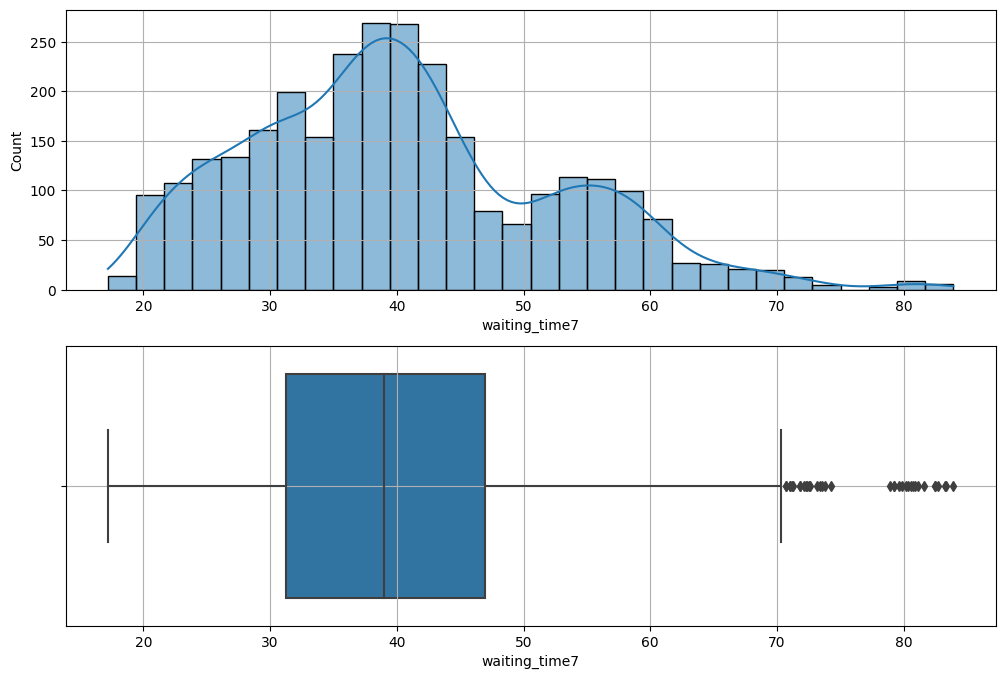

In [16]:
eda_1_n('waiting_time7')

,count,mean,std,min,25%,50%,75%,max
ride_per,2922.0,0.841582,0.052185,0.597,0.806,0.846,0.878,0.969


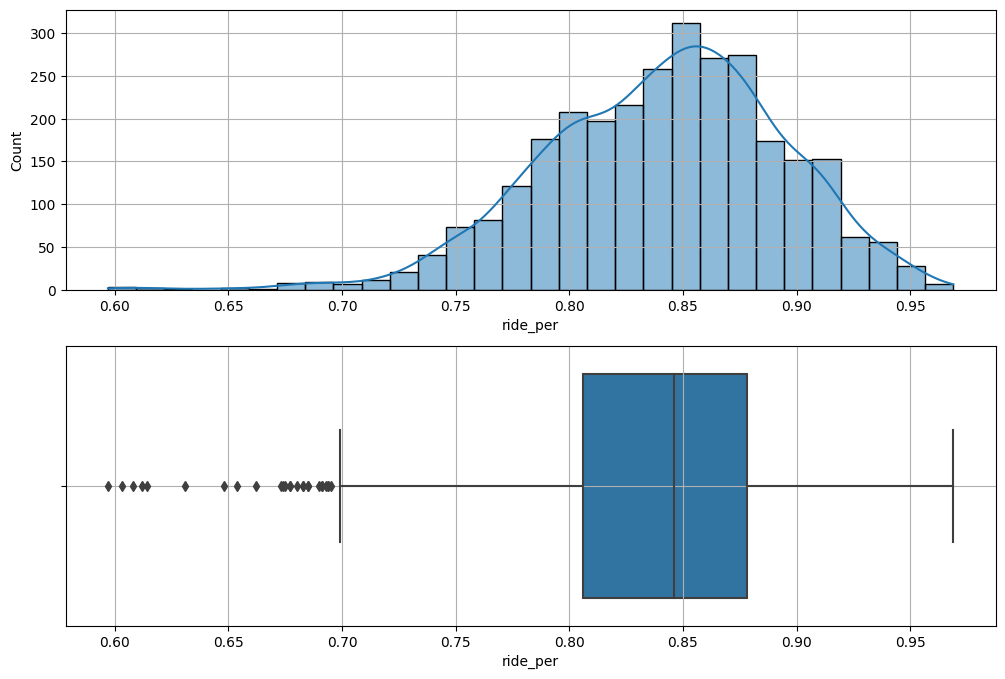

In [17]:
eda_1_n('ride_per')

,count,mean,std,min,25%,50%,75%,max
car_cnt,2922.0,418.701916,133.755162,132.0,278.0,454.0,522.0,1413.0


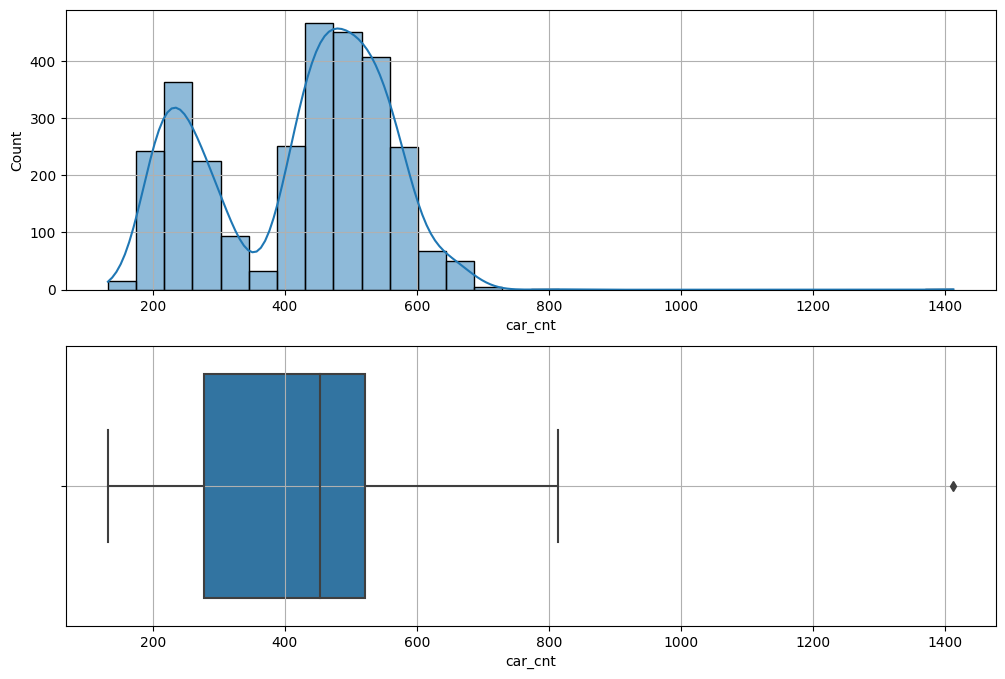

In [18]:
eda_1_n('car_cnt')

,count,mean,std,min,25%,50%,75%,max
request_cnt,2922.0,3925.607803,1509.741713,527.0,2162.5,4720.5,5110.0,6182.0


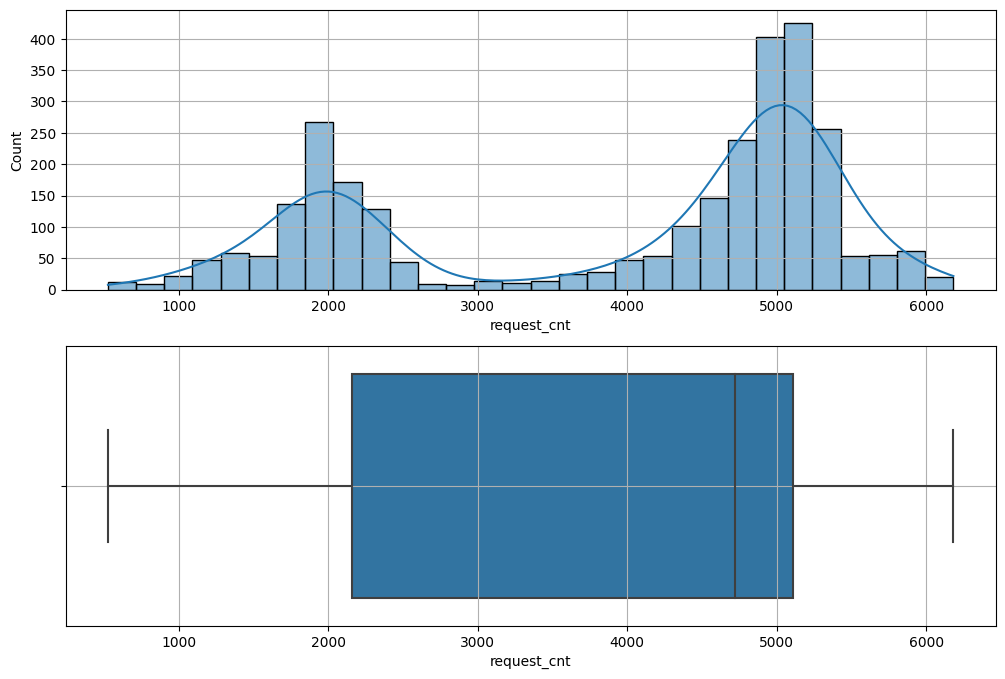

In [19]:
eda_1_n('request_cnt')

,count,mean,std,min,25%,50%,75%,max
ride_cnt,2922.0,3283.895277,1249.165876,462.0,1779.0,3932.5,4241.0,5189.0


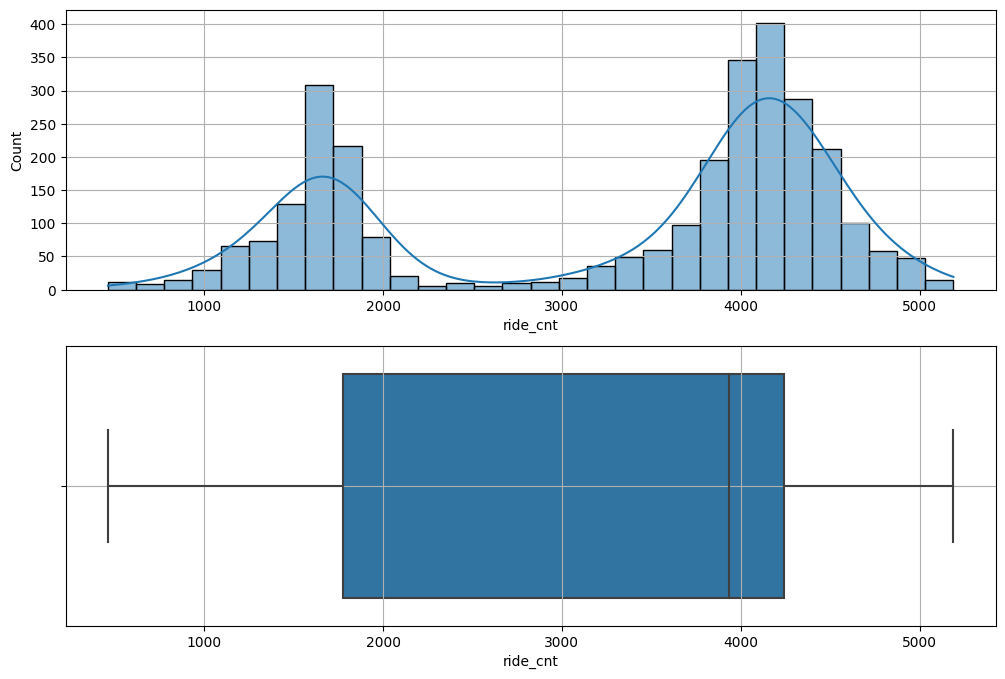

In [20]:
eda_1_n('ride_cnt')

### (3) 범주형 변수
* 범주형 변수들에 대해서 단변량 분석을 수행합니다.

spring    736
summer    736
autumn    728
winter    722
Name: season, dtype: int64
spring    0.251882
summer    0.251882
autumn    0.249144
winter    0.247091
Name: season, dtype: float64


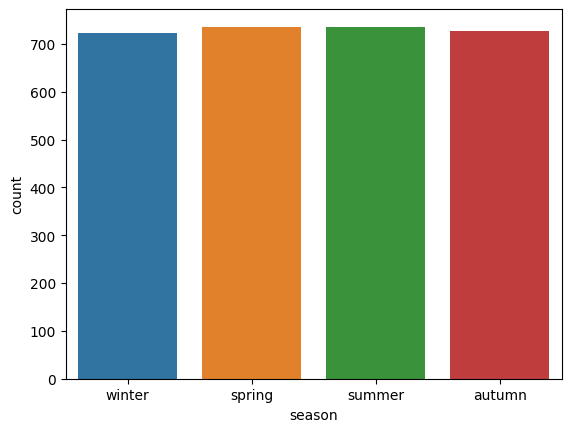

In [21]:
categorical('season')

3    418
4    418
5    418
6    417
0    417
1    417
2    417
Name: weekday, dtype: int64
3    0.143053
4    0.143053
5    0.143053
6    0.142710
0    0.142710
1    0.142710
2    0.142710
Name: weekday, dtype: float64


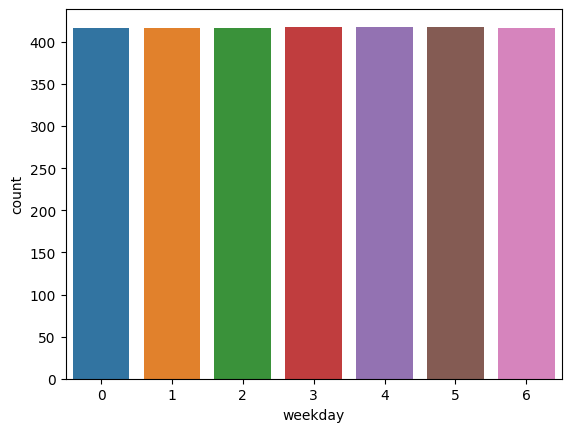

In [22]:
categorical('weekday')

## 3.EDA 2단계 - feature와 target 비교 분석하기

* **세부요구사항**
    * 숫자 feature --> target
        * 전체 상관계수 구하고 시각화(heatmap)해서 파악해봅시다.
        * 상위 n개의 feature와 target의 상점도를 확인해봅시다.
    * 범주 feature --> target
        * 시각화 : 평균 비교 barplot
        * 수치화 : t-test, anova
    * 이번 단계에서는 함수 생성은 선택사항 입니다.

### (1) 숫자 feature --> Target
* 전체 상관계수 시각화(heatmap)
* 상위 n개 산점도 그리기

#### 1) 전체 상관계수 시각화

<ipython-input-23-8acae3292821>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),


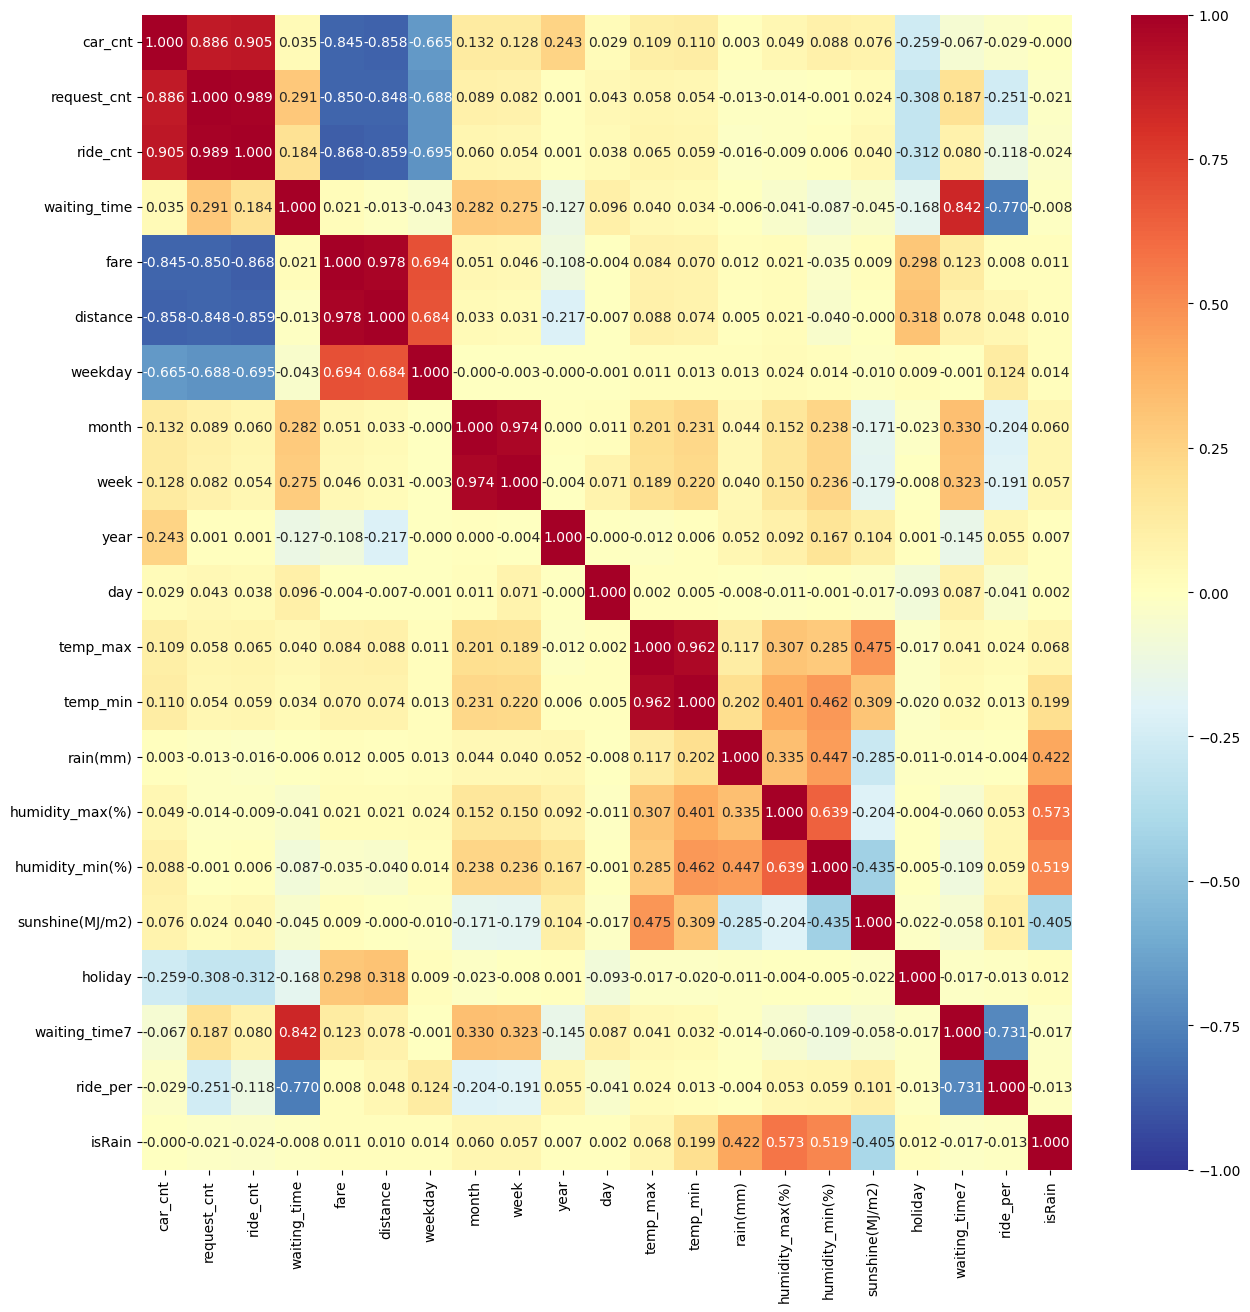

In [23]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

#### 2) 산점도

<Axes: xlabel='ride_per', ylabel='waiting_time'>

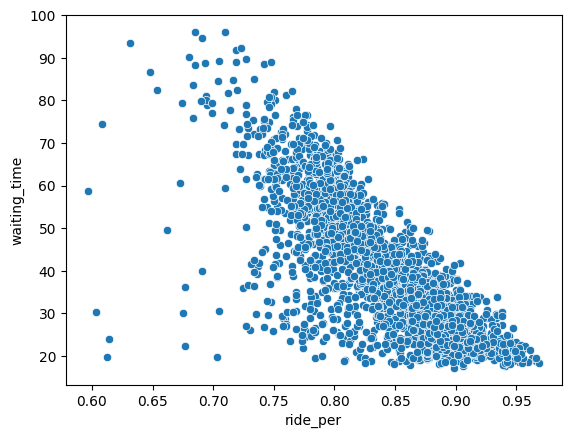

In [24]:
sns.scatterplot(x='ride_per', y='waiting_time', data = df)

In [25]:
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'weekday', 'month', 'week', 'year', 'day', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'season', 'holiday', 'waiting_time7', 'ride_per',
       'isRain'],
      dtype='object')

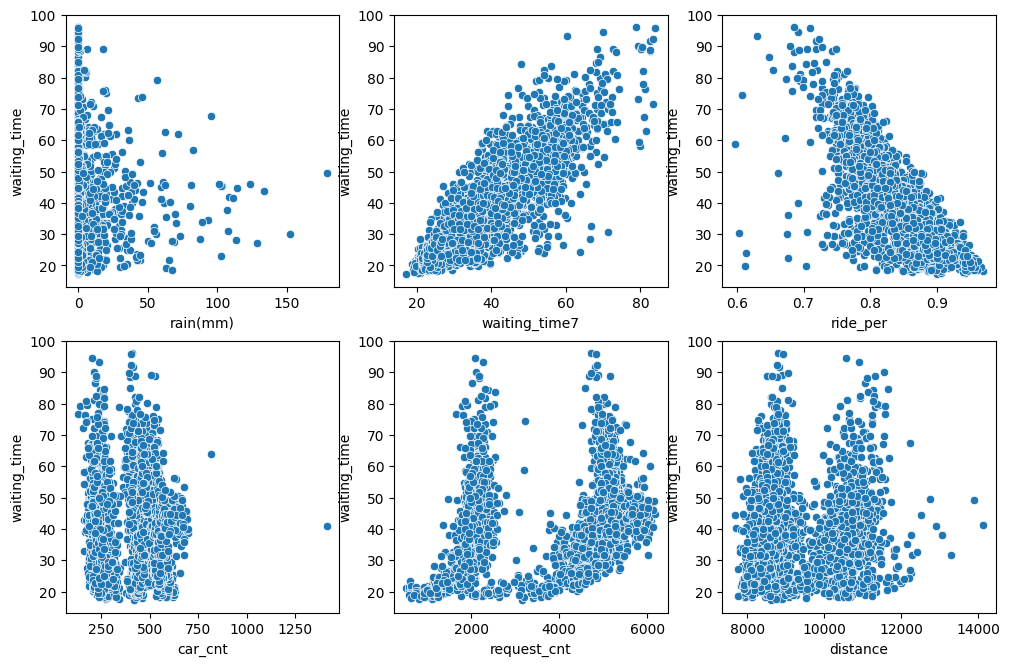

In [26]:
plt.figure(figsize = (12,12))
plt.subplot(3,3,1)
sns.scatterplot(x='rain(mm)',y='waiting_time',data=df)
plt.subplot(3,3,2)
sns.scatterplot(x='waiting_time7', y='waiting_time', data = df)
plt.subplot(3,3,3)
sns.scatterplot(x='ride_per', y='waiting_time', data = df)
plt.subplot(3,3,4)
sns.scatterplot(x='car_cnt', y='waiting_time', data = df)
plt.subplot(3,3,5)
sns.scatterplot(x='request_cnt', y='waiting_time', data = df)
plt.subplot(3,3,6)
sns.scatterplot(x='distance', y='waiting_time', data = df)
plt.show()

### (2) 범주 feature --> Target

* 범주형 변수들과 target 간의 관계를 살펴봅시다.
    * 시각화 : 평균비교 barplot
    * 수치화 : t-검정, anova

<Axes: xlabel='season', ylabel='waiting_time'>

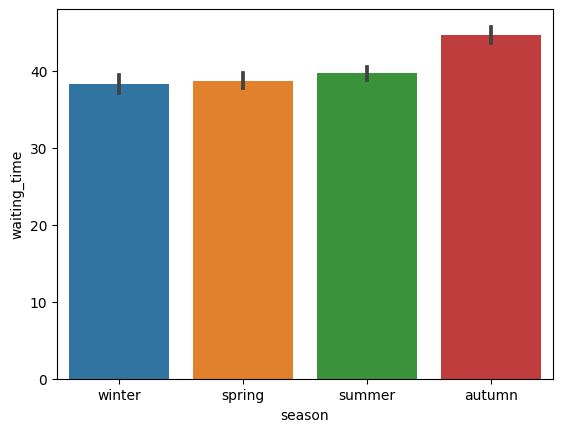

In [27]:
sns.barplot(x="season", y="waiting_time", data=df)

<Axes: xlabel='holiday', ylabel='waiting_time'>

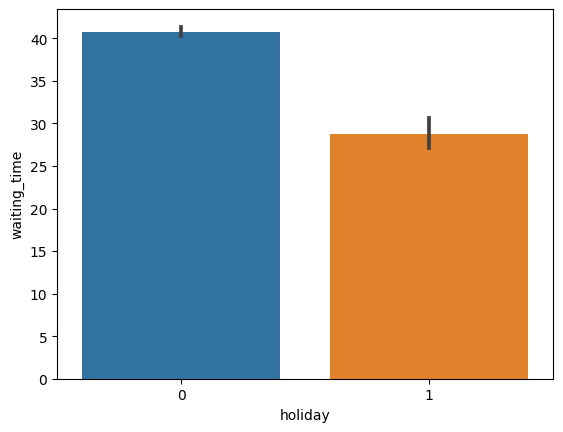

In [28]:
sns.barplot(x="holiday", y="waiting_time", data=df)

<Axes: xlabel='weekday', ylabel='waiting_time'>

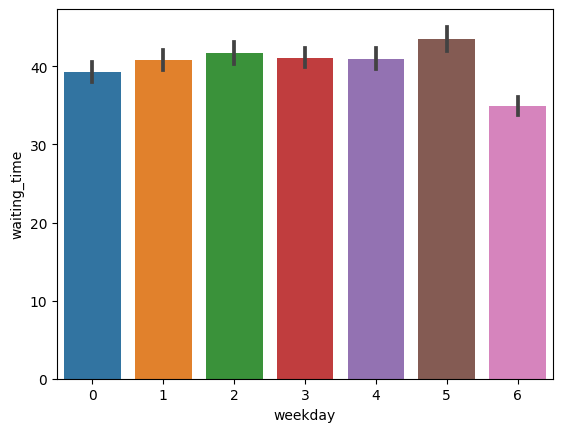

In [29]:
sns.barplot(x="weekday", y="waiting_time", data=df)

<Axes: xlabel='month', ylabel='ride_cnt'>

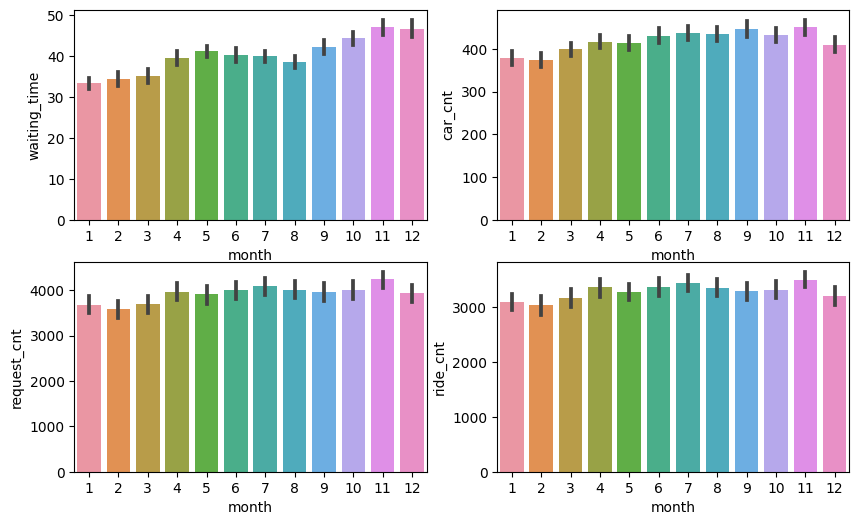

In [30]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.barplot(x="month", y="waiting_time", data=df)
plt.subplot(2,2,2)
sns.barplot(x="month", y="car_cnt", data=df)
plt.subplot(2,2,3)
sns.barplot(x="month", y="request_cnt", data=df)
plt.subplot(2,2,4)
sns.barplot(x="month", y="ride_cnt", data=df)

<Axes: xlabel='isRain', ylabel='ride_cnt'>

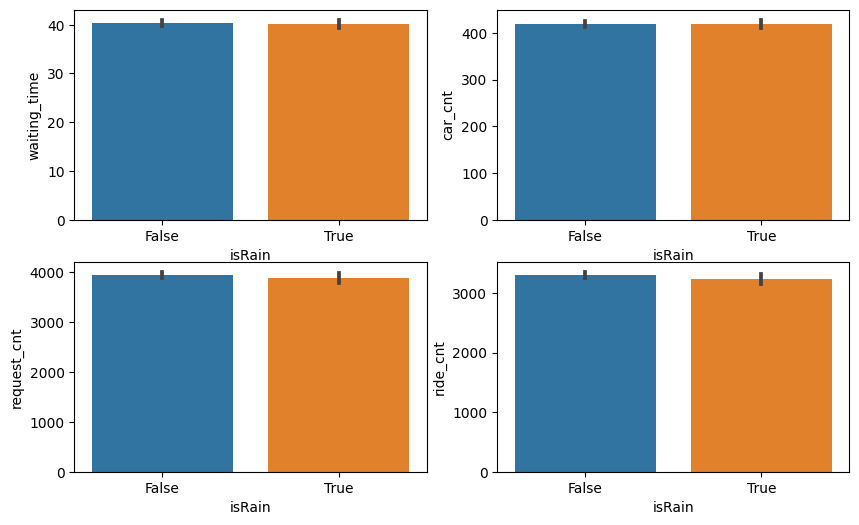

In [31]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.barplot(x="isRain", y="waiting_time", data=df)
plt.subplot(2,2,2)
sns.barplot(x="isRain", y="car_cnt", data=df)
plt.subplot(2,2,3)
sns.barplot(x="isRain", y="request_cnt", data=df)
plt.subplot(2,2,4)
sns.barplot(x="isRain", y="ride_cnt", data=df)

<Axes: xlabel='holiday', ylabel='ride_cnt'>

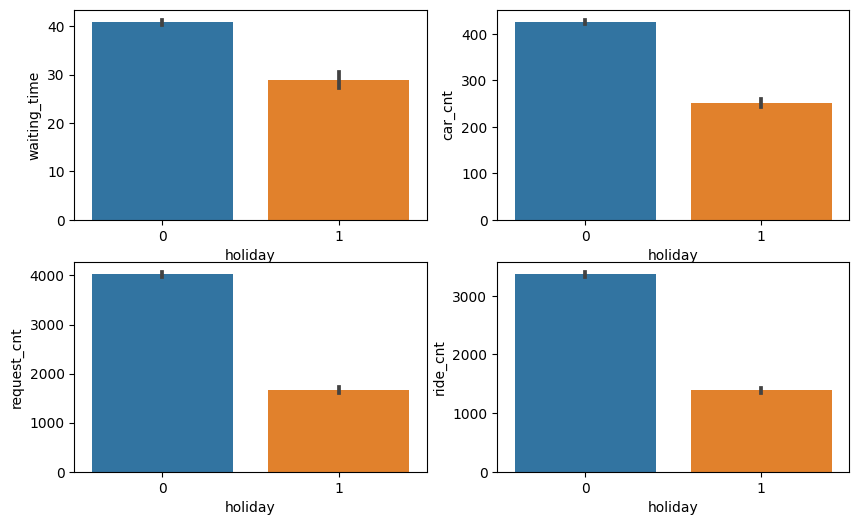

In [32]:
plt.figure(figsize = (10,6))
plt.subplot(2,2,1)
sns.barplot(x="holiday", y="waiting_time", data=df)
plt.subplot(2,2,2)
sns.barplot(x="holiday", y="car_cnt", data=df)
plt.subplot(2,2,3)
sns.barplot(x="holiday", y="request_cnt", data=df)
plt.subplot(2,2,4)
sns.barplot(x="holiday", y="ride_cnt", data=df)

In [ ]:
df[df['holiday']==1]

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,17.2,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
48,2015-02-18,205,1509,1350,41.4,2475,11992,2,2,8,2015,18,8.6,-2.7,0.0,87.0,36.0,11.93,winter,1,33.457143,0.895,False
49,2015-02-19,182,1350,1093,27.6,2700,14136,3,2,8,2015,19,11.1,-1.3,0.0,84.0,33.0,11.33,winter,1,31.942857,0.810,False
50,2015-02-20,179,1359,1186,19.8,2476,11864,4,2,8,2015,20,6.7,4.8,6.5,99.0,48.0,2.74,winter,1,29.357143,0.873,True
59,2015-03-01,195,1719,1604,28.4,2436,11122,6,3,9,2015,1,9.0,-1.9,0.0,72.0,26.0,15.50,spring,1,33.671429,0.933,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2809,2022-09-10,261,1672,1386,32.6,2561,11856,5,9,36,2022,10,26.4,20.6,0.1,81.0,54.0,10.27,autumn,1,40.457143,0.829,True
2810,2022-09-11,218,1701,1438,27.1,2535,11179,6,9,36,2022,11,27.3,20.3,0.0,86.0,61.0,13.15,autumn,1,36.314286,0.845,False
2832,2022-10-03,267,1707,1374,41.0,2367,9868,0,10,40,2022,3,23.0,14.4,19.7,100.0,69.0,6.50,autumn,1,40.885714,0.805,True
2838,2022-10-09,219,1851,1546,30.9,2421,10275,6,10,40,2022,9,11.7,8.2,0.0,93.0,63.0,9.31,autumn,1,44.071429,0.835,False


In [33]:
df2 = df[df['holiday']==1]
df3 = df[df['holiday']==0]

In [34]:
df2.head(100)

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
48,2015-02-18,205,1509,1350,22.6,2475,11992,2,2,8,2015,18,8.6,-2.7,0.0,87.0,36.0,11.93,winter,1,32.585714,0.895,False
49,2015-02-19,182,1350,1093,41.4,2700,14136,3,2,8,2015,19,11.1,-1.3,0.0,84.0,33.0,11.33,winter,1,33.457143,0.810,False
50,2015-02-20,179,1359,1186,27.6,2476,11864,4,2,8,2015,20,6.7,4.8,6.5,99.0,48.0,2.74,winter,1,31.942857,0.873,True
59,2015-03-01,195,1719,1604,29.8,2436,11122,6,3,9,2015,1,9.0,-1.9,0.0,72.0,26.0,15.50,spring,1,33.557143,0.933,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,2021-05-19,341,1981,1735,21.0,2342,9655,2,5,20,2021,19,22.9,16.1,0.6,83.0,43.0,6.80,spring,1,28.500000,0.876,True
2348,2021-06-06,254,1380,1298,22.4,2481,10646,6,6,22,2021,6,23.6,19.5,0.0,81.0,61.0,7.02,summer,1,32.257143,0.941,False
2418,2021-08-15,190,1137,1059,24.7,2530,11232,6,8,32,2021,15,32.7,22.6,0.0,76.0,41.0,23.19,summer,1,30.114286,0.931,False
2454,2021-09-20,225,1504,1267,22.7,2351,9820,0,9,38,2021,20,26.1,19.5,41.6,98.0,62.0,11.84,autumn,1,37.671429,0.842,True


<ipython-input-35-fa3747645340>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),


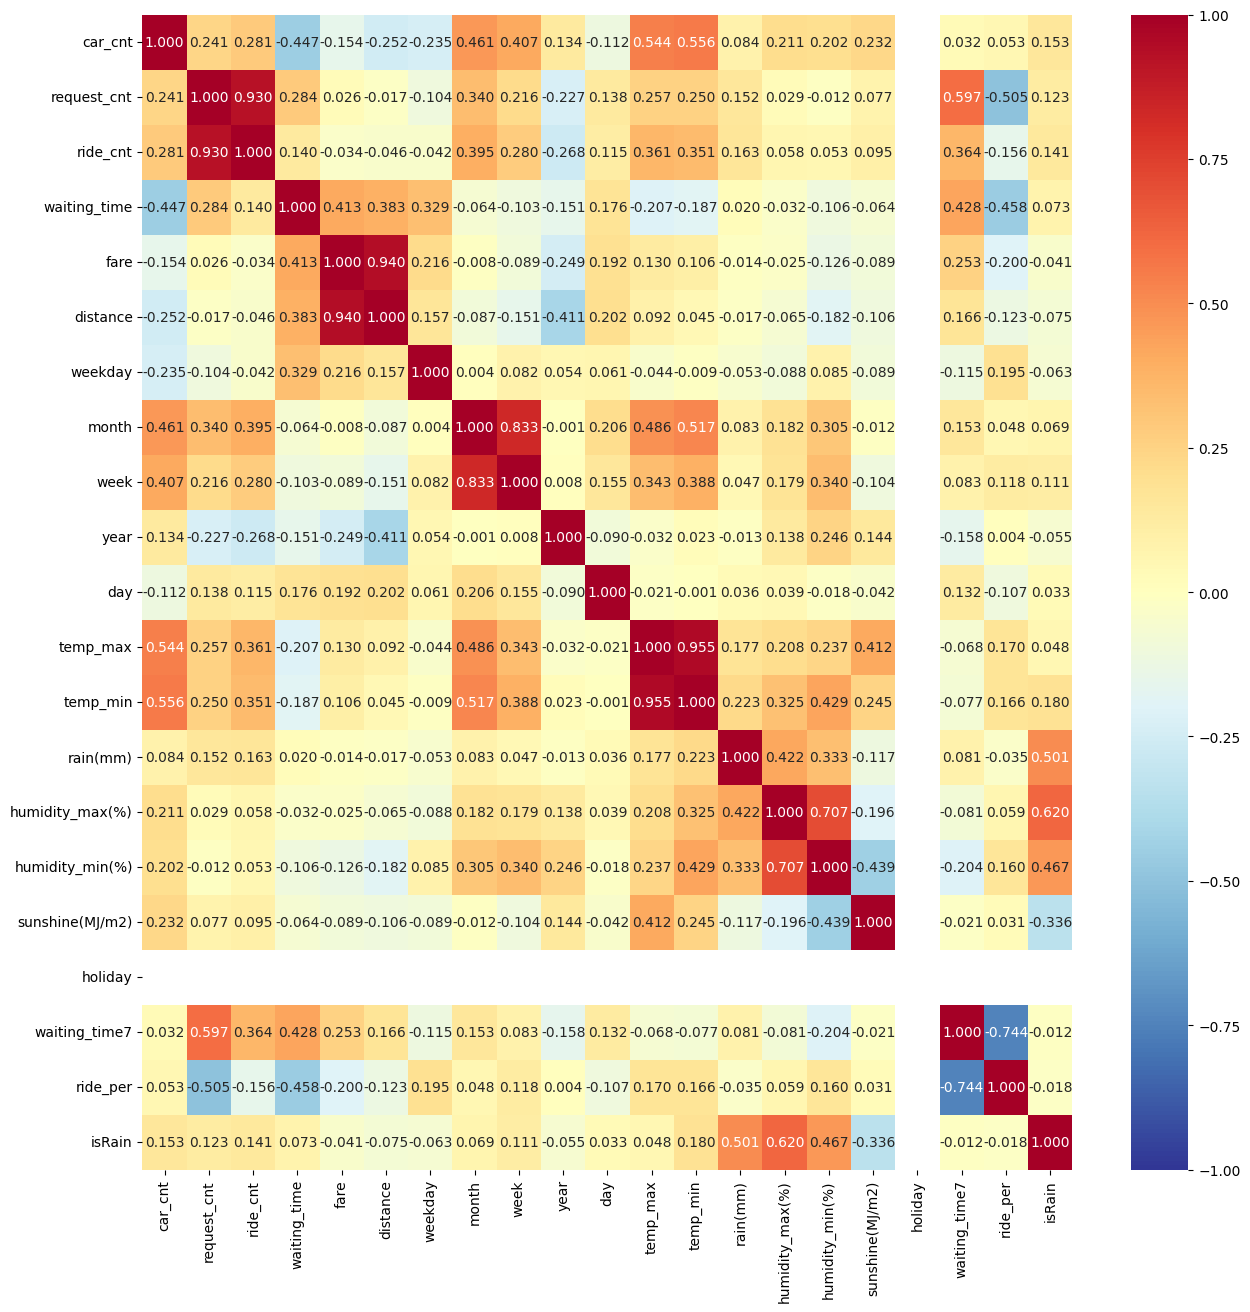

In [35]:
plt.figure(figsize = (15, 15)) # 공휴일
sns.heatmap(df2.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

<ipython-input-36-d8ef0de00eb5>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df3.corr(),


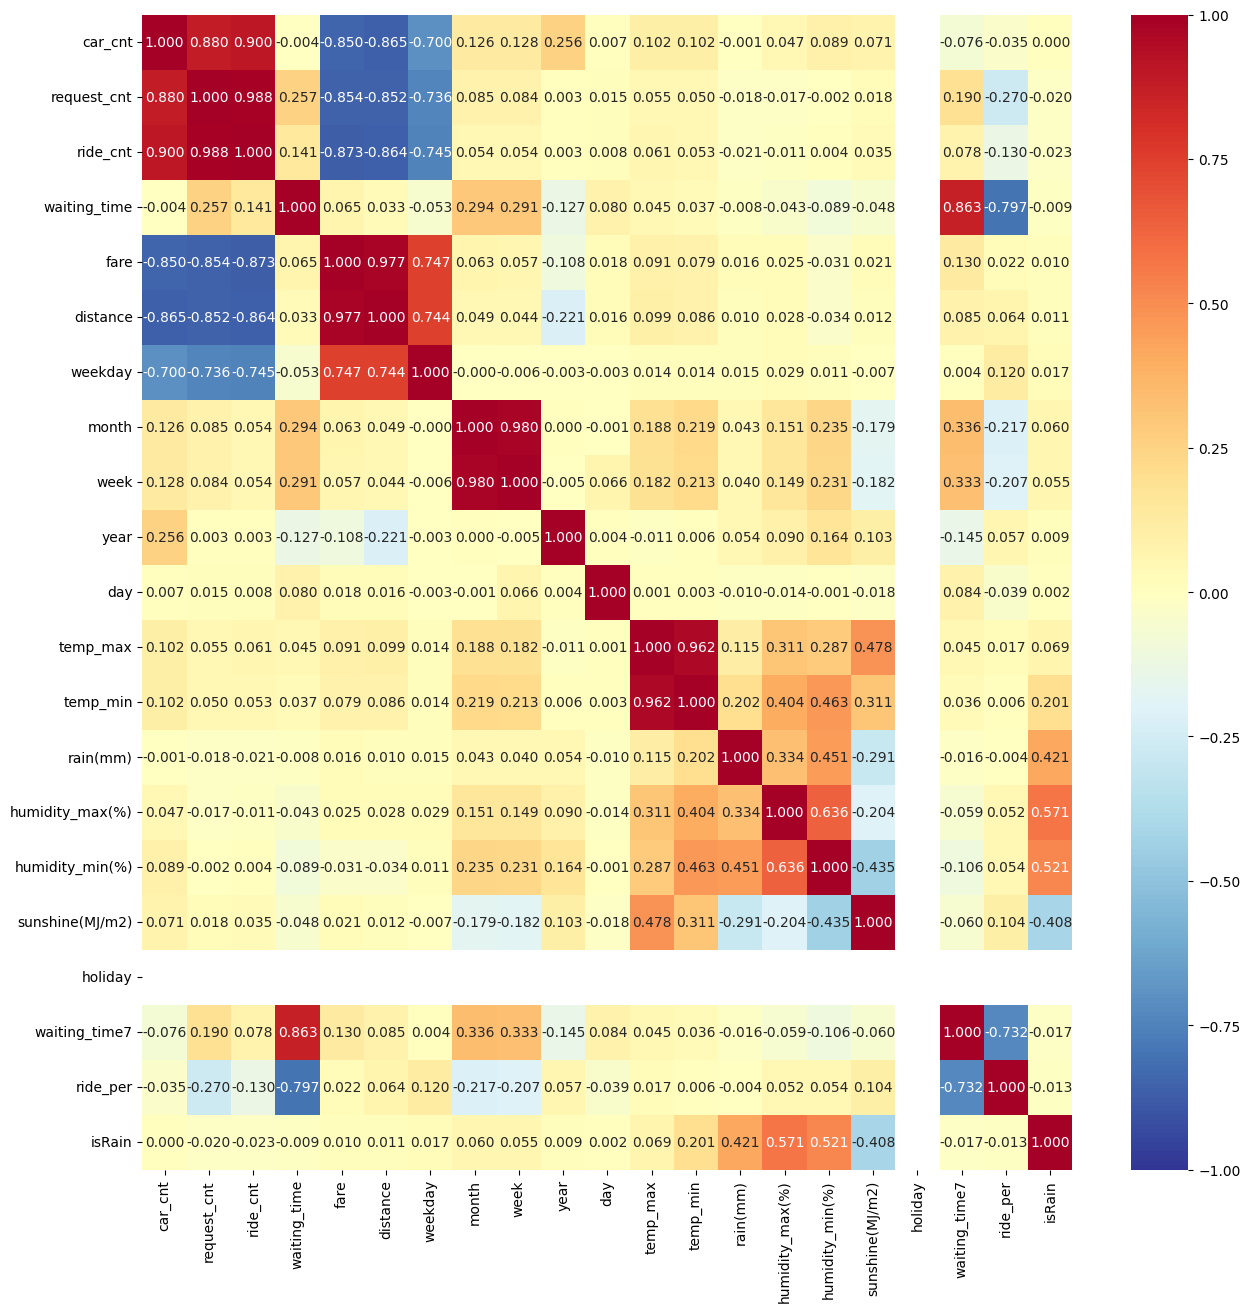

In [36]:
plt.figure(figsize = (15, 15)) #평일
sns.heatmap(df3.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

#수치화 t-test

In [37]:
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,NaN,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
1,2015-01-02,420,3158,2839,17.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,17.200000,0.899,False
2,2015-01-03,209,1648,1514,26.2,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,21.700000,0.919,False
3,2015-01-04,196,1646,1526,24.5,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,22.633333,0.927,False
4,2015-01-05,421,4250,3730,26.2,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,23.525000,0.878,True


In [38]:
df.isna().sum()

Date               0
car_cnt            0
request_cnt        0
ride_cnt           0
waiting_time       1
fare               0
distance           0
weekday            0
month              0
week               0
year               0
day                0
temp_max           1
temp_min           1
rain(mm)           1
humidity_max(%)    1
humidity_min(%)    1
sunshine(MJ/m2)    1
season             0
holiday            0
waiting_time7      1
ride_per           0
isRain             0
dtype: int64

In [ ]:
df.columns

Index(['Date', 'car_cnt', 'request_cnt', 'ride_cnt', 'waiting_time', 'fare',
       'distance', 'weekday', 'month', 'week', 'year', 'day', 'temp_max',
       'temp_min', 'rain(mm)', 'humidity_max(%)', 'humidity_min(%)',
       'sunshine(MJ/m2)', 'season', 'holiday', 'waiting_time7', 'ride_per'],
      dtype='object')

In [42]:
# temp = df.loc[df['waiting_time'].notnull()]
# temp = df.loc[df['waiting_time7'].notnull()]
# temp = df.loc[df['temp_max'].notnull()]
# temp = df.loc[df['temp_min'].notnull()]
# temp = df.loc[df['rain(mm)'].notnull()]
# temp = df.loc[df['humidity_max(%)'].notnull()]
# temp = df.loc[df['humidity_min(%)'].notnull()]
# temp = df.loc[df['sunshine(MJ/m2)'].notnull()]
df['waiting_time'].fillna(method='bfill', inplace=True)
df['waiting_time7'].fillna(method='bfill', inplace=True)
df['temp_max'].fillna(method='ffill', inplace=True)
df['temp_min'].fillna(method='ffill', inplace=True)
df['rain(mm)'].fillna(method='ffill', inplace=True)
df['humidity_max(%)'].fillna(method='ffill', inplace=True)
df['humidity_min(%)'].fillna(method='ffill', inplace=True)
df['sunshine(MJ/m2)'].fillna(method='ffill', inplace=True)

In [43]:
df.isna().sum()

Date               0
car_cnt            0
request_cnt        0
ride_cnt           0
waiting_time       0
fare               0
distance           0
weekday            0
month              0
week               0
year               0
day                0
temp_max           0
temp_min           0
rain(mm)           0
humidity_max(%)    0
humidity_min(%)    0
sunshine(MJ/m2)    0
season             0
holiday            0
waiting_time7      0
ride_per           0
isRain             0
dtype: int64

In [46]:
workday = df.loc[df['holiday']==0, 'waiting_time']
holiday = df.loc[df['holiday']==1, 'waiting_time'] # 휴일

In [47]:
spst.ttest_ind(workday, holiday) #2보다 크므로 차이가 있다, pvalue는 0.05보다 작으므로 차이가 있

TtestResult(statistic=9.312627391632658, pvalue=2.379362853929624e-20, df=2920.0)

In [44]:
winter = df.loc[df['season']=='winter', 'waiting_time']
spring = df.loc[df['season']=='spring', 'waiting_time']
summer = df.loc[df['season']=='summer', 'waiting_time']
autumn = df.loc[df['season']=='autumn', 'waiting_time']

In [ ]:
winter=df.loc[df['season']=='winter']
spring=df.loc[df['season']=='spring']
summer=df.loc[df['season']=='summer']
autumn=df.loc[df['season']=='autumn']

In [ ]:
df['winter']=df.loc[df['season']==winter]
df['spring']=df.loc[df['season']==spring]
df['summer']=df.loc[df['season']==summer]
df['autumn']=df.loc[df['season']==autumn]

In [ ]:
df4

In [48]:
spst.f_oneway(winter, spring, summer, autumn)

F_onewayResult(statistic=32.74811679269593, pvalue=8.187411650619431e-21)

In [ ]:
#32배, pvalue 0.05이하

In [ ]:
plt.figure(figsize = (20, 20))
sns.heatmap(df.groupby('season').corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.3f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값값
plt.show()

In [ ]:
heatmap(df.groupby('month').mean())

In [ ]:
df3= df[df['holiday']==1]
df3

In [ ]:
df3

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,...,season,holiday,waiting_time7,ride_per,temp_max_y,temp_min_y,rain(mm)_y,humidity_max(%)_y,humidity_min(%)_y,sunshine(MJ/m2)_y
2557,2022-01-01,297,1281,1133,22.0,2378,9965,5,1,52,...,winter,1,37.114286,0.884,2.5,-4.4,0.3,83.0,40.0,8.52
2587,2022-01-31,209,1393,1181,25.1,2399,10382,0,1,5,...,winter,1,32.085714,0.848,0.8,-2.6,2.9,93.0,61.0,9.04
2588,2022-02-01,222,1336,1129,28.2,2574,11909,1,2,5,...,winter,1,30.771429,0.845,-0.2,-5.8,0.0,83.0,37.0,14.68
2589,2022-02-02,210,1387,1185,23.8,2259,8950,2,2,5,...,winter,1,28.385714,0.854,0.2,-6.9,0.0,74.0,35.0,14.87
2616,2022-03-01,265,1498,1301,20.9,2321,9543,1,3,9,...,spring,1,24.657143,0.868,8.5,-2.2,0.0,76.0,30.0,19.53
2681,2022-05-05,259,2035,1700,29.6,2414,10566,3,5,18,...,spring,1,40.714286,0.835,25.2,13.8,0.0,86.0,45.0,25.60
2684,2022-05-08,242,1837,1565,37.8,2531,11240,6,5,18,...,spring,1,41.300000,0.852,25.0,11.1,0.0,87.0,32.0,29.25
2713,2022-06-06,249,1909,1594,22.5,2357,9862,0,6,23,...,summer,1,36.071429,0.835,25.0,15.1,0.0,70.0,41.0,17.34
2783,2022-08-15,240,1984,1646,24.3,2267,9061,0,8,33,...,summer,1,34.528571,0.830,29.9,24.1,0.0,88.0,61.0,23.34
2808,2022-09-09,285,2062,1564,27.1,2393,10305,4,9,36,...,autumn,1,41.928571,0.758,28.1,19.1,0.0,63.0,39.0,18.76


In [ ]:
# plt.plot('Date', 'Ozone', 'g-', data = df, label = 'Ozone')
# plt.plot('Date', 'Temp', 'r-', data = df3, label = 'Temp')

# plt.xlabel('Date')
# plt.legend()
# plt.show()

## 4.변수 정리

* Target과 관련성이 높은 feature와 그렇지 않은 feature를 정리합니다.
* 여기서의 판단은 다소 주관적입니다. 조금 정확하지 않아도 괜찮습니다.
* 다음 단계 모델링에서 관련이 적은 변수는 포함시키거나, 제외를 고려할때 활용합니다.

* 강한 관계의 변수

In [ ]:
ride_per
waiting_time7

* 중간(약한) 관계의 변수

In [ ]:
month
week
request_cnt
ride_cnt
day
year

* (거의) 관계가 없는 변수

In [ ]:
distance
fare
기상요소

## 5.데이터 저장

* **세부 요구사항**
    * 혹시 데이터에 변경이 발생할 수 있으니, 저장해 놓읍시다.
    * joblib.dump를 이용하시오.
    * 저장할 파일 이름 : data2.pkl

In [15]:
df.head()

,Date,car_cnt,request_cnt,ride_cnt,waiting_time,fare,distance,weekday,month,week,year,day,temp_max,temp_min,rain(mm),humidity_max(%),humidity_min(%),sunshine(MJ/m2),season,holiday,waiting_time7,ride_per,isRain
0,2015-01-01,213,1023,924,17.2,2427,10764,3,1,1,2015,1,-2.0,-8.9,0.0,63.0,28.0,9.07,winter,1,NaN,0.903,False
1,2015-01-02,420,3158,2839,26.2,2216,8611,4,1,1,2015,2,2.4,-9.2,0.0,73.0,37.0,8.66,winter,0,NaN,0.899,False
2,2015-01-03,209,1648,1514,24.5,2377,10198,5,1,1,2015,3,8.2,0.2,0.0,89.0,58.0,5.32,winter,0,NaN,0.919,False
3,2015-01-04,196,1646,1526,26.2,2431,10955,6,1,1,2015,4,7.9,-0.9,0.0,95.0,52.0,6.48,winter,0,NaN,0.927,False
4,2015-01-05,421,4250,3730,23.6,2214,8663,0,1,2,2015,5,4.1,-7.4,3.4,98.0,29.0,10.47,winter,0,NaN,0.878,True


In [49]:
joblib.dump(df, '/content/drive/MyDrive/project/data2.pkl')
joblib.dump(df2, '/content/drive/MyDrive/project/data_holi.pkl')
joblib.dump(df3, '/content/drive/MyDrive/project/data_work.pkl')

['/content/drive/MyDrive/project/data_work.pkl']